<a href="https://colab.research.google.com/github/Tfviktor/ModelExplorer/blob/master/%D0%A3%D0%BD%D0%B8%D0%B2%D0%B5%D1%80%D1%81%D0%B8%D1%82%D0%B5%D1%82_%D0%B8%D1%81%D0%BA%D1%83%D1%81%D1%81%D1%82%D0%B2%D0%B5%D0%BD%D0%BD%D0%BE%D0%B3%D0%BE_%D0%B8%D0%BD%D1%82%D0%B5%D0%BB%D0%BB%D0%B5%D0%BA%D1%82%D0%B0_%D0%98%D0%BD%D1%82%D0%B5%D0%BD%D1%81%D0%B8%D0%B2_02_02_02_02_%D0%97%D0%B0%D0%BD%D1%8F%D1%82%D0%B8%D0%B5_%E2%84%962_%D0%9E%D0%B1%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%BA%D0%B0_%D1%82%D0%B5%D0%BA%D1%81%D1%82%D0%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install terra_ai

     |████████████████████████████████| 92kB 6.4MB/s 


In [ ]:
from terra_ai import терра_ии

Все необходимые библиотеки установлены и готовы к работе


# Определение заболевания по симптомам

In [ ]:
# Загружаем базу симптомов заболеваний
терра_ии.загрузить_базу('СИМПТОМЫ ЗАБОЛЕВАНИЙ')

Загрузка данных
Это может занять несколько минут...
Загрузка данных завершена 

url: https://storage.googleapis.com/aiu_bucket/symptoms.zip



In [ ]:
# Выводим примеры
терра_ии.показать_примеры(база = 'симптомы')

В данной базе содержатся симптомы следующих заболеваний:
['Аппендицит', 'Гастрит', 'Гепатит', 'Дуоденит', 'Колит', 'Панкреатит', 'Холицестит', 'Эзофагит', 'Энтерит', 'Язва']

Пример симптомов случайного заболевания:
Заболевание:  Гепатит
Симптомы:
     * Желтуха начало гепатита напоминает грипп: повышение температуры тела головная боль общее недомогание


In [ ]:
количество_анализируемых_слов = 1100
размер_окна = 50
шаг = 10
# Создаем выборки для обучения нейронной сети
(обучающая_выборка, метки_обучающей_выборки), (тестовая_выборка, метки_тестовой_выборки) = терра_ии.создать_текстовые_выборки(
    количество_анализируемых_слов,
    размер_окна,
    шаг)

Формирование выборки завершено


In [ ]:
# Создаем нейронную сеть
ветвь1 = 'Эмбеддинг-100-'+str(количество_анализируемых_слов)+'-'+str(размер_окна)+'\
 Дропаут-0.3\
 Выравнивающий\
 Полносвязный-200\
 Дропаут-0.4'
ветвь2 = 'Полносвязный-4096 Полносвязный-256 Дропаут-0.5 Полносвязный-64'
ветвь3 = 'Полносвязный-100'
нейронка = терра_ии.создать_составную_сеть(
    обучающая_выборка, метки_обучающей_выборки,
    ветвь1, ветвь2, ветвь3)

Схема модели:


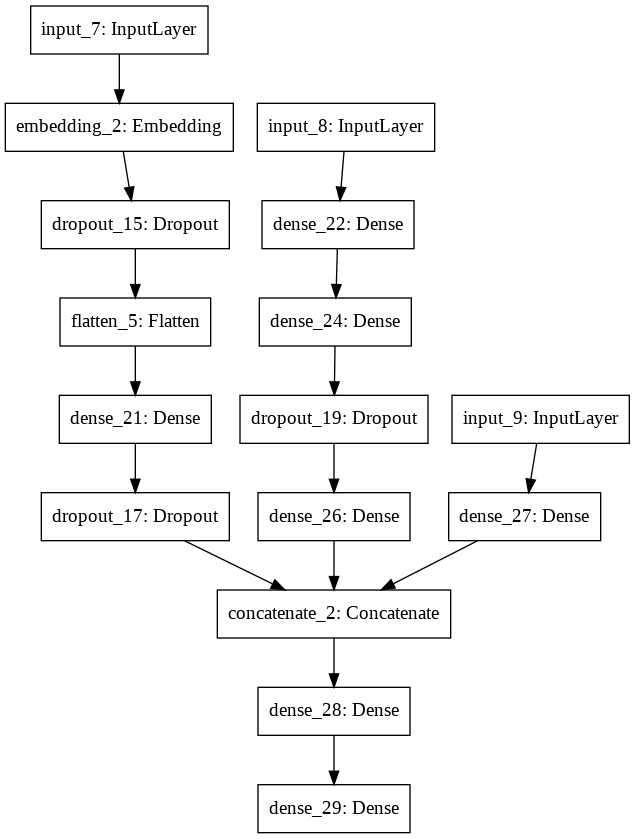

In [ ]:
# Выводим структуру модели
терра_ии.схема_модели(нейронка)

Эпоха №1  Время обучения: 11.11c Точность на обучающей выборке: 98.1%        Точность на проверочной выборке: 83.75%
Эпоха №2  Время обучения: 9.9c   Точность на обучающей выборке: 100.0%       Точность на проверочной выборке: 84.38%
Эпоха №3  Время обучения: 9.91c  Точность на обучающей выборке: 100.0%       Точность на проверочной выборке: 85.0%
Эпоха №4  Время обучения: 10.02c Точность на обучающей выборке: 100.0%       Точность на проверочной выборке: 86.25%
Эпоха №5  Время обучения: 9.9c   Точность на обучающей выборке: 100.0%       Точность на проверочной выборке: 86.25%
Эпоха №6  Время обучения: 9.86c  Точность на обучающей выборке: 100.0%       Точность на проверочной выборке: 86.25%
Эпоха №7  Время обучения: 9.82c  Точность на обучающей выборке: 100.0%       Точность на проверочной выборке: 86.87%
Эпоха №8  Время обучения: 9.75c  Точность на обучающей выборке: 100.0%       Точность на проверочной выборке: 86.87%
Эпоха №9  Время обучения: 9.89c  Точность на обучающей выборке: 1

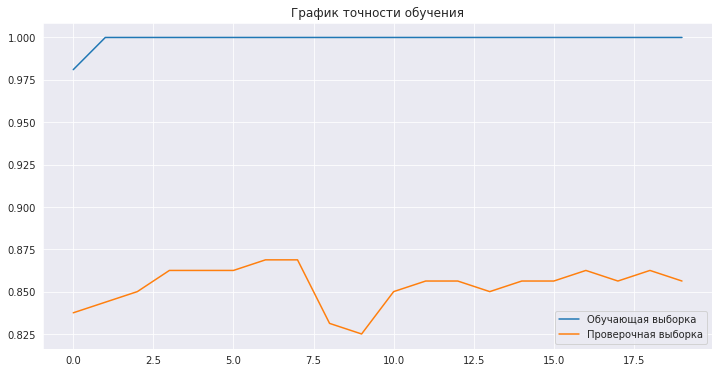

In [ ]:
# Обучаем модель
терра_ии.обучение_модели(
    нейронка,
    обучающая_выборка, метки_обучающей_выборки,
    тестовая_выборка, метки_тестовой_выборки,
    размер_пакета = 16,
    количество_эпох = 20)

In [ ]:
# Демонстрация результата работы нейронной сети
симптомы = '''
Боль при панкреатите обычно очень интенсивная, постоянная, характер болевых ощущений описывается больными как режущий, тупой. 
Локализуется боль под ложечкой,подреберье либо справа, либо слева, в зависимости от места поражения железы, в случае, когда воспаляется весь орган, то боль носит опоясывающий характер.
Высокая температура
Низкое или наоборот высокое давление. 
Цвет лица.У больного заостряются черты лица, сначала становится бледными кожные покровы, постепенно цвет лица приобретает серо-землистый оттенок.
Икота, тошнота.
Сухость во рту
икота
отрыжка
тошнота
Рвота. 
Диарея или запор. 
Стул  чаще всего пенистый, частый со зловонным запахом, с частицами не переваренной пищи.
Постоянная одышка 
липкий пот
обильный желтый налет на языке.
Вздутие живота. 
Желтушность склер, кожи. 
'''
терра_ии.тест_модели_симптомы(нейронка, размер_окна, шаг, симптомы, классы = ['Аппендицит', 'Гастрит', 'Гепатит', 'Дуоденит', 'Колит', 'Панкреатит', 'Холицестит', 'Эзофагит', 'Энтерит', 'Язва'])

Аппендицит     -  0.0 %
Гастрит        -  0.0 %
Гепатит        -  0.0 %
Дуоденит       -  0.0 %
Колит          -  0.0 %
Панкреатит     -  87.03 %
Холицестит     -  0.0 %
Эзофагит       -  0.0 %
Энтерит        -  12.96 %
Язва           -  0.01 %

Диагноз: Панкреатит - 87.03%


# Предсказание цены квартиры

In [ ]:
# Загружаем базу квартир
терра_ии.загрузить_базу(база = 'КВАРТИРЫ', справка = True)

Загрузка данных завершена 

url: https://storage.googleapis.com/aiu_bucket/moscow.csv
Загружена база квартир



In [ ]:
# Показываем примеры
терра_ии.показать_пример_квартиры(количество=3)

* Пример объявления: 

Количество комнат:  1
Площадь квартиры:   41/?/?
Метро/ЖД станция:   Борисово м.
От станции:         3т
Дом:                7/14 П
Балкон:             
Санузел:            
Примечание:         Просторная,светлая квартира.Рядом благоустроенный парк Борисовские Пруды,парк Царицыно,отличное место для отдыха и прогулок.В квартире две лоджии дают дополнительное пространство и без того просторной квартире.Документам более 5 лет,один собственник.Альтернатива подобрана.
-----------
Цена квартиры:     6 млн  799 тыс рублей
---------------------------------------------------------------------------------------------------------------

* Пример объявления: 

Количество комнат:  1
Площадь квартиры:   52.5/?/?
Метро/ЖД станция:   Мичуринский проспект м.
От станции:         3т
Дом:                17/39 ?
Балкон:             
Санузел:            
Примечание:         Продаётся 1-к квартира площадью 52.52 кв.м. на 17-м этаже 39 этажного дома
Жилой комплекс "Крылья" -
3 мин. пешко

In [ ]:
# Создаем выборки
(обучающая_выборка, метки_обучающей_выборки), (тестовая_выборка, метки_тестовой_выборки), инструменты = терра_ии.создать_выборки_квартир()

/usr/local/lib/python3.6/dist-packages/terra_ai/квартиры.py:544: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  xTrainCommentsIndexes = np.array(xTrainCommentsIndexes)


In [ ]:
ветвь1 = 'Полносвязный-100-relu Полносвязный-50-linear'
ветвь2 = 'Полносвязный-500-linear'
финальная_часть = 'Полносвязный-1000-relu Полносвязный-500-relu Полносвязный-100-relu Полносвязный-1-linear'
нейронка = терра_ии.создать_составную_сеть_квартиры(обучающая_выборка, ветвь1, ветвь2, финальная_часть)

Схема модели:


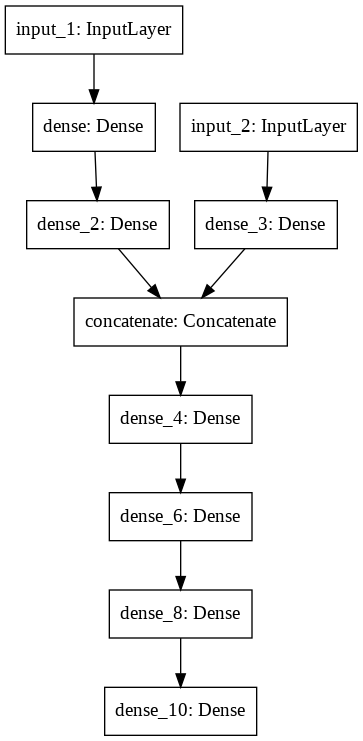

In [ ]:
# Выводим схему модели
терра_ии.схема_модели(нейронка)

Эпоха №1  Время обучения: 6.96c  Ошибка на обучающей выборке: 2.064млн       Ошибка на проверочной выборке: 2.008млн
Эпоха №2  Время обучения: 4.26c  Ошибка на обучающей выборке: 1.757млн       Ошибка на проверочной выборке: 1.763млн
Эпоха №3  Время обучения: 4.31c  Ошибка на обучающей выборке: 1.175млн       Ошибка на проверочной выборке: 1.178млн
Эпоха №4  Время обучения: 4.16c  Ошибка на обучающей выборке: 1.391млн       Ошибка на проверочной выборке: 1.251млн
Эпоха №5  Время обучения: 4.15c  Ошибка на обучающей выборке: 1.005млн       Ошибка на проверочной выборке: 1.05млн
Эпоха №6  Время обучения: 4.16c  Ошибка на обучающей выборке: 1.101млн       Ошибка на проверочной выборке: 1.092млн
Эпоха №7  Время обучения: 4.02c  Ошибка на обучающей выборке: 1.017млн       Ошибка на проверочной выборке: 1.123млн
Эпоха №8  Время обучения: 4.11c  Ошибка на обучающей выборке: 0.98млн        Ошибка на проверочной выборке: 1.05млн
Эпоха №9  Время обучения: 4.17c  Ошибка на обучающей выборке: 0.87

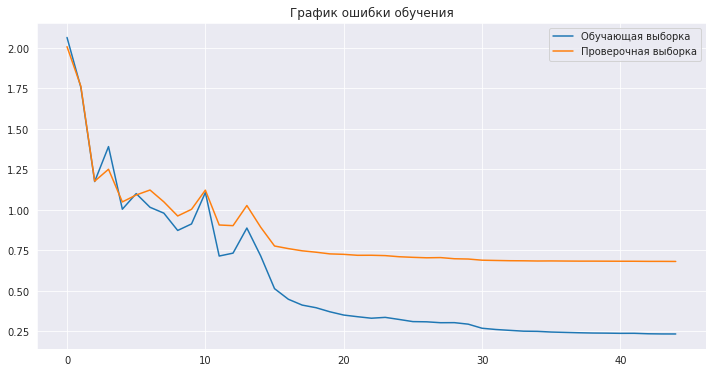

In [ ]:
# Обучаем модель
терра_ии.обучение_модели_квартиры(
    нейронка,
    обучающая_выборка, метки_обучающей_выборки,
    тестовая_выборка, метки_тестовой_выборки,
    размер_пакета = 128,
    количество_эпох = 15,
    инструменты = инструменты)

In [ ]:
#@title Тестирование модели: выберите параметры
метро = "\u0421\u043F\u0430\u0440\u0442\u0430\u043A \u043C." #@param ['Авиамоторная м.', 'Автозаводская м.', 'Автозаводская м. (МЦК)', 'Академическая м.', 'Алабушево станция', 'Александровский Сад м.', 'Алексеевская м.', 'Алма-Атинская м.', 'Алтуфьево м.', 'Андроновка м. (МЦК)', 'Аннино м.', 'Апрелевка станция', 'Арбатская м.', 'Аэропорт (старая) станция', 'Аэропорт Внуково станция', 'Аэропорт м.', 'Бабушкинская м.', 'Багратионовская м.', 'Балтийская м. (МЦК)', 'Баррикадная м.', 'Бауманская м.', 'Беговая м.', 'Бекасово-1 станция', 'Белокаменная м. (МЦК)', 'Беломорская м.', 'Белорусская м.', 'Беляево м.', 'Бибирево м.', 'Библиотека им.Ленина м.', 'Битцевский парк м.', 'Борисово м.', 'Боровицкая м.', 'Боровское шоссе м.', 'Ботанический сад м.', 'Ботанический сад м. (МЦК)', 'Братиславская м.', 'Бульвар Адмирала Ушакова м.', 'Бульвар Дмитрия Донского м.', 'Бульвар Рокоссовского м.', 'Бульвар Рокоссовского м. (МЦК)', 'Бунинская аллея м.', 'Бутырская м.', 'ВДНХ м.', 'Варшавская м.', 'Верхние Котлы м. (МЦК)', 'Верхние Лихоборы м.', 'Весенняя станция', 'Владыкино м.', 'Внуково станция', 'Водный стадион м.', 'Войковская м.', 'Волгоградский проспект м.', 'Волжская м.', 'Волоколамская м.', 'Воробьевы Горы м.', 'Выставочная м.', 'Выхино м.', 'Говорово м.', 'Гривно станция', 'Дачная станция', 'Деловой центр м.', 'Динамо м.', 'Дмитровская м.', 'Добрынинская м.', 'Домодедовская м.', 'Достоевская м.', 'Дубровка м.', 'Дубровка м. (МЦК)', 'Жулебино м.', 'ЗИЛ м. (МЦК)', 'Зорге м. (МЦК)', 'Зябликово м.', 'Измайлово м. (МЦК)', 'Измайловская м.', 'Калужская м.', 'Кантемировская м.', 'Каховская м.', 'Каширская м.', 'Киевская м.', 'Китай-Город м.', 'Кожуховская м.', 'Кокошкино станция', 'Коломенская м.', 'Колхозная станция', 'Коммунарка м.', 'Комсомольская м.', 'Коньково м.', 'Коптево м. (МЦК)', 'Косино м.', 'Котельники м.', 'Красногвардейская м.', 'Краснопресненская м.', 'Красносельская м.', 'Красные ворота м.', 'Крекшино станция', 'Крестьянская Застава м.', 'Кропоткинская м.', 'Крылатское м.', 'Крымская м. (МЦК)', 'Кузнецкий мост м.', 'Кузьминки м.', 'Кунцевская м.', 'Курская м.', 'Кутузовская м.', 'Кутузовская м. (МЦК)', 'Ленинский проспект м.', 'Лермонтовский проспект м.', 'Лесопарковая м.', 'Лихоборы м. (МЦК)', 'Локомотив м. (МЦК)', 'Ломоносовский проспект м.', 'Лубянка м.', 'Лужники м. (МЦК)', 'Лухмановская м.', 'Львовская станция', 'Люблино м.', 'Марксистская м.', 'Марьина Роща м.', 'Марьино м.', 'Маяковская м.', 'Медведково м.', 'Международная м.', 'Менделеевская м.', 'Минская м.', 'Митино м.', 'Мичуринец станция', 'Мичуринский проспект м.', 'Молодежная м.', 'Мякинино м.', 'Нагатинская м.', 'Нагорная м.', 'Нахимовский проспект м.', 'Некрасовка м.', 'Нижегородская м. (МЦК)', 'Нижегородская улица м.', 'Новогиреево м.', 'Новокосино м.', 'Новокузнецкая м.', 'Новопеределкино м.', 'Новослободская м.', 'Новохохловская м. (МЦК)', 'Новоясеневская м.', 'Новые Черемушки м.', 'Озерная м.', 'Окружная м.', 'Окружная м. (МЦК)', 'Окская улица м.', 'Октябрьская м.', 'Октябрьское поле м.', 'Ольховая м.', 'Орехово м.', 'Отрадное м.', 'Охотный ряд м.', 'Павелецкая м.', 'Панфиловская м. (МЦК)', 'Парк Победы м.', 'Парк культуры м.', 'Партизанская м.', 'Первомайская м.', 'Перово м.', 'Петровский парк м.', 'Петровско-Разумовская м.', 'Печатники м.', 'Пионерская м.', 'Планерная м.', 'Площадь Гагарина м. (МЦК)', 'Площадь Ильича м.', 'Площадь Революции м.', 'Победа станция', 'Подольск станция', 'Полежаевская м.', 'Полянка м.', 'Пражская м.', 'Преображенская площадь м.', 'Прокшино м.', 'Пролетарская м.', 'Проспект Вернадского м.', 'Проспект Мира м.', 'Профсоюзная м.', 'Пушкинская м.', 'Пятницкое шоссе м.', 'Раменки м.', 'Рассказовка м.', 'Рассудово станция', 'Речной вокзал м.', 'Рижская м.', 'Римская м.', 'Ростокино м. (МЦК)', 'Румянцево м.', 'Рязанский проспект м.', 'Савеловская м.', 'Савеловская метро', 'Саларьево м.', 'Свиблово м.', 'Севастопольская м.', 'Селигерская м.', 'Семеновская м.', 'Серпуховская м.', 'Силикатная станция', 'Славянский бульвар м.', 'Смоленская м.', 'Сокол м.', 'Соколиная Гора м. (МЦК)', 'Сокольники м.', 'Солнцево м.', 'Спартак м.', 'Спортивная м.', 'Сретенский бульвар м.', 'Стахановская м.', 'Столбово м.', 'Стрешнево м. (МЦК)', 'Строгино м.', 'Студенческая м.', 'Сухаревская м.', 'Сходненская м.', 'Таганская м.', 'Тверская м.', 'Театральная м.', 'Текстильщики м.', 'Теплый стан м.', 'Технопарк м.', 'Тимирязевская м.', 'Толстопальцево станция', 'Третьяковская м.', 'Тропарево м.', 'Трубная м.', 'Тульская м.', 'Тургеневская м.', 'Тушинская м.', 'Угрешская м. (МЦК)', 'Улица 1905 года м.', 'Улица Академика Янгеля м.', 'Улица Горчакова м.', 'Улица Дмитриевского м.', 'Улица Скобелевская м.', 'Улица Старокачаловская м.', 'Университет м.', 'Филатов луг м.', 'Филевский парк м.', 'Фили м.', 'Фонвизинская м.', 'Фрунзенская м.', 'Ховрино м.', 'Хорошево м. (МЦК)', 'Хорошевское м.', 'ЦСКА м.', 'Царицыно м.', 'Цветной бульвар м.', 'Черкизовская м.', 'Чертановская м.', 'Чеховская м.', 'Чистые пруды м.', 'Чкаловская м.', 'Шаболовская м.', 'Шелепиха м.', 'Шелепиха м. (МЦК)', 'Шипиловская м.', 'Шоссе Энтузиастов м.', 'Шоссе Энтузиастов м. (МЦК)', 'Щелковская м.', 'Щербинка станция', 'Щукинская м.', 'Электрозаводская м.', 'Юго-Восточная м.', 'Юго-Западная м.', 'Южная м.', 'Ясенево м.']
до_станции =  5#@param {type:"integer"}
способ_передвижения = "\u0442\u0440\u0430\u043D\u0441\u043F\u043E\u0440\u0442" #@param ['пешком', 'транспорт']
этаж =  6#@param {type:"integer"}
всего_этажей =  14#@param {type:"integer"}
тип_балкона = 'Л' #@param ['Л', 'Б', '2Б', '-', '2Б2Л', 'БЛ', '3Б', '2Л', 'Эрк', 'Б2Л', 'ЭркЛ', '3Л', '4Л', '*Л', '*Б']
тип_санузла = '2' #@param ['2', 'Р', 'С', '-', '2С', '+', '4Р', '2Р', '3С', '4С', '4', '3', '3Р']
площадь = 50.6 #@param {type:"number"}
описание = '\u043F\u0440\u0435\u043A\u0440\u0430\u0441\u043D\u0430\u044F \u043A\u0432\u0430\u0440\u0442\u0438\u0440\u0430 \u0440\u044F\u0434\u043E\u043C \u0441 \u043F\u0430\u0440\u043A\u043E\u043C' #@param {type:"string"}

In [ ]:
# Тестируем модель
терра_ии.тест_модели_квартиры(
    нейронка, инструменты, 
    метро, до_станции, способ_передвижения, этаж, всего_этажей, тип_балкона, тип_санузла, площадь, описание)

Цена квартиры: 11млн  157тыс рублей
